# 넷플릭스-왓챠 검색량 비교하기

### 네이버 개발자센터>Documents>서비스API>데이터랩>통합검색어 트렌드(python3)

파라미터의 start date-end date를 설정하기위해 '두번째과정'에서 postdate를 정렬하여 이용(python2)
결과: 2012-05-02/2019-11-27 -> 네이버 api에서 제공하는 startDate가 2016-01-01부터이므로 2016-01-01로 변경

In [1]:
import os
import sys
import urllib.request
import json
client_id = "iG1mQJ_IvvGFkd7l1xNP"
client_secret = "RM8dxGAtBb"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2016-01-01\",\"endDate\":\"2019-11-27\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"넷플릭스\",\"keywords\":[\"넷플\",\"netflix\"]},{\"groupName\":\"왓챠\",\"keywords\":[\"watcha\"]}],\"device\":\"pc\"}";
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    scraped=response_body.decode('utf-8')
    print(response_body.decode('utf-8'))    
else:
    print("Error Code:" + rescode)

result=json.loads(scraped)

{"startDate":"2016-01-01","endDate":"2019-11-30","timeUnit":"month","results":[{"title":"넷플릭스","keywords":["넷플","netflix"],"data":[{"period":"2016-01-01","ratio":70.64045},{"period":"2016-02-01","ratio":31.24128},{"period":"2016-03-01","ratio":26.43288},{"period":"2016-04-01","ratio":23.41325},{"period":"2016-05-01","ratio":21.61121},{"period":"2016-06-01","ratio":18.49859},{"period":"2016-07-01","ratio":19.8955},{"period":"2016-08-01","ratio":19.09853},{"period":"2016-09-01","ratio":21.80823},{"period":"2016-10-01","ratio":22.33955},{"period":"2016-11-01","ratio":19.59443},{"period":"2016-12-01","ratio":25.46988},{"period":"2017-01-01","ratio":25.35033},{"period":"2017-02-01","ratio":22.55207},{"period":"2017-03-01","ratio":31.46487},{"period":"2017-04-01","ratio":22.83323},{"period":"2017-05-01","ratio":26.91328},{"period":"2017-06-01","ratio":36.19578},{"period":"2017-07-01","ratio":52.62889},{"period":"2017-08-01","ratio":34.95826},{"period":"2017-09-01","ratio":26.60556},{"period"

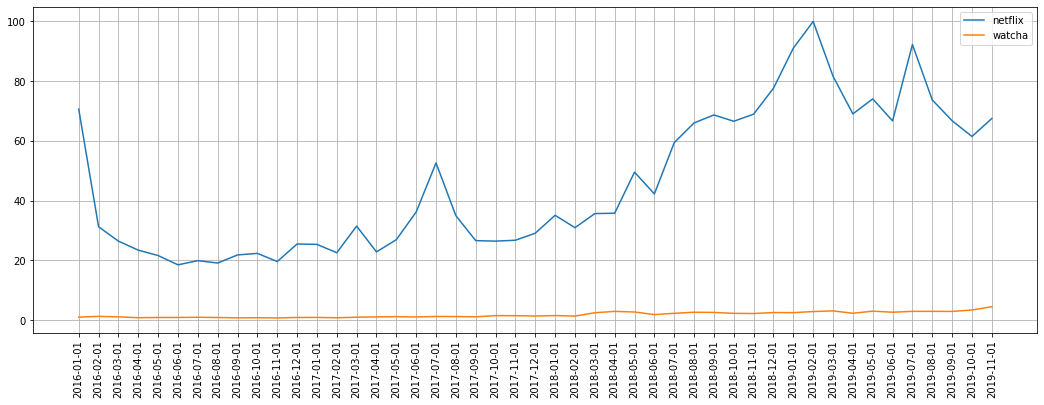

In [4]:
###검색량 최대치를 기준으로 설정하여 이를 기준으로 나타낸 상대적인 그래프
#그래프 두개 겹쳐 그리기
import matplotlib.pyplot as plt
import numpy as np

ratio1 = [each['ratio'] for each in result['results'][0]['data']]
date1 = [each['period'] for each in result['results'][0]['data']]
ratio2 = [each['ratio'] for each in result['results'][1]['data']]
date2 = [each['period'] for each in result['results'][1]['data']]


plt.figure(figsize=(18,6))
plt.plot(date1,ratio1,date2,ratio2)
plt.grid()
plt.xticks(rotation=90)
plt.legend(['netflix','watcha'])
plt.show()